In [34]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from numpy.linalg import norm
from scipy.interpolate import UnivariateSpline
from sklearn.decomposition import PCA
from datetime import date

import asyncio
import math
import os
import sys
import time
sys.path.append("C:\\Users\\Sam Yu\\Documents\\GitHub\\LiquidCrystals\\src")

from LiquidCrystalSystem import LCSystem

In [3]:
def get_config(r):
    
    if r == 0:
        particle_no_index = 3
        confinement = "Circle"
    else:
        particle_no_index = 4
        confinement = "Annulus"
    
    config = {"R": 25,
              "r": r,
              "b": 5,
              "a": 0.25,
              "confinement": confinement,
              "datasets_path": f"C:\\Users\\Sam Yu\\Desktop\\School\\4A\\Phys_437A_Research_Project\\datasets\\r={r}",
              "particle_no_index": particle_no_index}
    
    return config

In [4]:
run_config = get_config(r=0)

print(f"{run_config}\n")

globals().update(run_config)
    
# particle numbers
Ns = sorted([int(_path_.split("_")[particle_no_index]) for _path_ in os.listdir(datasets_path)])

print(f"Particle numbers: {Ns}")

{'R': 25, 'r': 0, 'b': 5, 'a': 0.25, 'confinement': 'Circle', 'datasets_path': 'C:\\Users\\Sam Yu\\Desktop\\School\\4A\\Phys_437A_Research_Project\\datasets\\r=0', 'particle_no_index': 3}

Particle numbers: [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200]


particle number: 20 -> density: 0.0400
particle number: 25 -> density: 0.0500
particle number: 30 -> density: 0.0600
particle number: 35 -> density: 0.0700
particle number: 40 -> density: 0.0800
particle number: 45 -> density: 0.0900
particle number: 50 -> density: 0.1000
particle number: 55 -> density: 0.1100
particle number: 60 -> density: 0.1200
particle number: 65 -> density: 0.1300
particle number: 70 -> density: 0.1400
particle number: 75 -> density: 0.1500
particle number: 80 -> density: 0.1600
particle number: 85 -> density: 0.1700
particle number: 90 -> density: 0.1800
particle number: 95 -> density: 0.1900
particle number: 100 -> density: 0.2000
particle number: 105 -> density: 0.2100
particle number: 110 -> density: 0.2200
particle number: 115 -> density: 0.2300
particle number: 120 -> density: 0.2400
particle number: 125 -> density: 0.2500
particle number: 130 -> density: 0.2600
particle number: 135 -> density: 0.2700
particle number: 140 -> density: 0.2800
particle number:

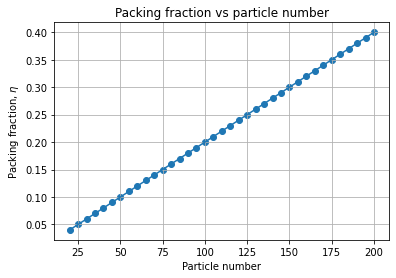

In [35]:
# Create the results directory for specified inner radius
base_results_path = f"C:\\Users\\Sam Yu\\Desktop\\School\\4A\\Phys_437A_Research_Project\\results\\{date.today()}\\"
results_path = os.path.join(base_results_path, f"r={r}")

if not os.path.exists(results_path):
    os.makedirs(results_path, exist_ok=True)
    
# Path for run at (number of features, number of samples)
num_of_features = 10
num_of_samples = 3

run_path = os.path.join(results_path, f"features_{num_of_features}_samples_{num_of_samples}")

if not os.path.exists(run_path):
    os.mkdir(run_path)
    

#### Plot the packing fractions with respect to particle number ####

# convert to densities
densities = [(N*a*b/(R**2-r**2)) for N in Ns]

for i, N in enumerate(Ns):
    print(f"particle number: {Ns[i]} -> density: {densities[i]:.4f}")

# Plot the packing fractions w.r.t particle number
with plt.ioff():
    fig, ax = plt.subplots()
    
ax.plot(Ns, densities)
ax.scatter(Ns, densities)
ax.set_xlabel("Particle number")
ax.set_ylabel(r"Packing fraction, $\eta$")
ax.set_title("Packing fraction vs particle number")
ax.grid()

fig.savefig(os.path.join(results_path, "packing_fraction_particles_no.png"))

plt.show()

plt.close(fig)

##### End plotting #####

In [6]:
systems = dict()

for _path_ in os.listdir(datasets_path):
    
    full_path = os.path.join(datasets_path, _path_, 'instanceRun')
    
    # Simulation summary notes exists
    if os.path.exists(os.path.join(full_path, f"MonteCarlo_{confinement}_SimNotes.txt")):
        
        lc = LCSystem(lc_data_path=full_path, confinement=confinement)
        num_of_particles = lc.sim_params['# of Ellipse']
        systems[num_of_particles] = lc
    
    # Simulation summary notes DNE
    else:
        
        lc = LCSystem(lc_data_path=full_path, confinement=confinement)
        lc.sim_params["R"] = R
        lc.sim_params["r"] = r
        lc.sim_params["Semi Major Axis"] = b
        lc.sim_params["Semi Minor Axis"] = a
        
        num_of_particles = lc.sim_params["# of Ellipse"]
        
        systems[num_of_particles] = lc

# remove outliers
#systems = {N:systems[N] for N in systems.keys() if N > 65 and N < 210}

for N in sorted(list(systems.keys())):
    print(f"Particle number: {N}, max step: {max(systems[N].snapshots.keys())}")

Particle number: 20, max step: 2000000.0
Particle number: 25, max step: 2000000.0
Particle number: 30, max step: 2000000.0
Particle number: 35, max step: 2000000.0
Particle number: 40, max step: 2000000.0
Particle number: 45, max step: 2000000.0
Particle number: 50, max step: 2000000.0
Particle number: 55, max step: 2000000.0
Particle number: 60, max step: 2000000.0
Particle number: 65, max step: 2000000.0
Particle number: 70, max step: 2000000.0
Particle number: 75, max step: 2000000.0
Particle number: 80, max step: 2000000.0
Particle number: 85, max step: 2000000.0
Particle number: 90, max step: 2000000.0
Particle number: 95, max step: 2000000.0
Particle number: 100, max step: 2000000.0
Particle number: 105, max step: 2000000.0
Particle number: 110, max step: 2000000.0
Particle number: 115, max step: 2000000.0
Particle number: 120, max step: 2000000.0
Particle number: 125, max step: 2000000.0
Particle number: 130, max step: 2000000.0
Particle number: 135, max step: 2000000.0
Particle

Conventional order parameter definition: $P^2_{max} = [<\frac{1}{N}\sum_{i=1}^{N}\cos(2\theta_i)>^2 + <\frac{1}{N}\sum_{i=1}^{N}\sin(2\theta_i)>^2]^{1/2}$

Particle number: 20, Density: 0.04, Order param: 0.019088315137694937
Particle number: 25, Density: 0.05, Order param: 0.03418345886641592
Particle number: 30, Density: 0.06, Order param: 0.007530919465154371
Particle number: 35, Density: 0.07, Order param: 0.059751352321596465
Particle number: 40, Density: 0.08, Order param: 0.0036077096502918037
Particle number: 45, Density: 0.09, Order param: 0.009465979349572448
Particle number: 50, Density: 0.1, Order param: 0.03268758896530067
Particle number: 55, Density: 0.11, Order param: 0.030205526877684574
Particle number: 60, Density: 0.12, Order param: 0.04348943368762404
Particle number: 65, Density: 0.13, Order param: 0.03854149837940504
Particle number: 70, Density: 0.14, Order param: 0.04865857842782433
Particle number: 75, Density: 0.15, Order param: 0.01714235593895036
Particle number: 80, Density: 0.16, Order param: 0.12361916532652241
Particle number: 85, Density: 0.17, Order param: 0.15420810137654098
Particle number: 90, Density

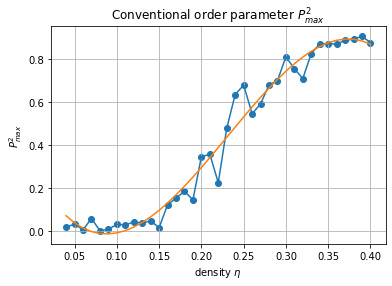

In [36]:
# Analysis using conventional order parameter

max_particle_num = max(systems.keys())
max_step = max(systems[max_particle_num].snapshots.keys())
min_step = min([step for step in systems[max_particle_num].snapshots.keys() if step > 0])

P2max = dict()

for particle_number in systems.keys():
    
    cosines = []
    sines = []
    system_state_at_mc_step = systems[particle_number].snapshots
        
    for mc_step in system_state_at_mc_step.keys():
        
        # wait for system to equilibrate
        if 50000 <= mc_step <= 2000000:
            
            snapshot = system_state_at_mc_step[mc_step]

            thetas = np.array([coord[-1] for coord in snapshot])

            cosine = np.mean([np.cos(2*theta) for theta in thetas])
            sine = np.mean([np.sin(2*theta) for theta in thetas])

            cosines.append(cosine)
            sines.append(sine)

    avg_cosine = np.mean(cosines)
    avg_sine = np.mean(sines)
    
    P2max[particle_number] = np.sqrt(avg_cosine**2 + avg_sine**2)
    
with plt.ioff():
    fig, ax = plt.subplots()

for key in sorted(list(P2max.keys())):
    print(f"Particle number: {key}, Density: {key*a*b/(R**2-r**2)}, Order param: {P2max[key]}")

densities = sorted([N*a*b/(R**2-r**2) for N in P2max.keys()])
order_params = [P2max[N] for N in sorted(list(P2max.keys()))]
spline = UnivariateSpline(densities, order_params)

ax.plot(densities, order_params)
ax.scatter(densities, order_params)
ax.plot(densities, spline(densities))
ax.grid()
ax.set_xlabel(r"density $\eta$")
ax.set_ylabel(r"$P^2_{max}$")
ax.set_title(r"Conventional order parameter $P^2_{max}$")

fig.savefig(os.path.join(results_path, "p2max.png"))

plt.show()

plt.close()

In [ ]:
system = systems[110]

fig = system.plot_snapshot(1499999, color_angles=True)
plt.show(fig)
plt.close()

cosines = []
sines = []

for step in sorted(list(system.snapshots.keys())):
    
    if 50000 <= step <= 2000000:
        
        snapshot = system.snapshots[step]

        cosine = np.mean([np.cos(2*theta) for theta in thetas])
        sine = np.mean([np.sin(2*theta) for theta in thetas])
        
        cosines.append(cosine)
        sines.append(sine)

        print(f"Step: {step}, Cosine: {cosine}, Sine: {sine}")

avg_cosine = np.mean(cosines)
avg_sine = np.mean(sines)

print(f"Average cosine over all snapshots: {avg_cosine}")
print(f"Average sine over all snapshots: {avg_sine}")

order_param = np.sqrt(avg_cosine**2 + avg_sine**2)
print(f"Order parameter: {order_param}")

In [10]:
def background(f):
    def wrapped(*args, **kwargs):
        return asyncio.get_event_loop().run_in_executor(None, f, *args, **kwargs)
    
    return wrapped

In [12]:
print(run_path)
print(datasets_path)

C:\Users\Sam Yu\Desktop\School\4A\Phys_437A_Research_Project\results\2021-11-23\r=0\features_10_samples_3
C:\Users\Sam Yu\Desktop\School\4A\Phys_437A_Research_Project\datasets\r=0


In [ ]:
# Visualize how the feature function chooses
# also plot the snapshots

if not os.path.exists(os.path.join(run_path, "method")):
    os.mkdir(os.path.join(run_path, "method"))

@background
def demonstrate_method(N):

    lc_system = systems[N]

    # maximally equilibrated step
    step_number = max(lc_system.snapshots.keys())

    # save folder
    save_folder = os.path.join(run_path, "method", f"N={N}")
    os.makedirs(save_folder, exist_ok=True)

    # input coordinates
    input_coords = lc_system.snapshots[step_number]

    # feature vectors and coordinates of feature particles
    _, ncs = create_feature_vectors_from_snapshot(input_coords, num_of_features, num_samples=3)

    # plot neighbors
    with plt.ioff():
        for i, probe in enumerate(list(ncs.keys())):
            particles_to_plot = [probe] + ncs[probe]
            fig = lc_system.plot_snapshot(step_number, extra_particles=particles_to_plot)

            fig.savefig(os.path.join(save_folder, f"N_{N}_figure_{i}.png"))
            plt.close(fig)

for N in systems.keys():
    demonstrate_method(N)

In [15]:
print(datasets_path)

C:\Users\Sam Yu\Desktop\School\4A\Phys_437A_Research_Project\datasets\r=0


In [13]:
# plot all the snapshots

@background
def plot_all_snapshots(N, path, start=1000000, end=1500000):
    
    if not os.path.exists(os.path.join(path, "plots")):
        os.mkdir(os.path.join(path, "plots"))
    
    lc_system = systems[N]
    
    save_folder = os.path.join(path, "plots", f"N={N}")
    os.makedirs(save_folder, exist_ok=True)

    # snapshots
    with plt.ioff():
        for step in lc_system.snapshots.keys():
            if start <= step <= end:
                fig = lc_system.plot_snapshot(step, color_angles=True)
                fig.savefig(os.path.join(save_folder, f"N_{N}_step_{step}.png"))
                plt.close(fig)
    
for N in systems.keys():
    plot_all_snapshots(N, path=datasets_path)

In [ ]:
# phase diagram

rs = [0, 2, 6, 10, 14]

densities = []
for rp in rs:
    txt_path = os.path.join(base_results_path, f"r={rp}", "phase_transition_IN.txt")
    with open(txt_path, "r") as in_file:
        density = float(in_file.readline().strip().split(" ")[-1])
        densities.append(density)

with plt.ioff():
    fig, ax = plt.subplots()
    
ax.plot(rs, densities, linestyle="dotted", label="Phase boundary")
ax.scatter(rs, densities, marker="v", label="PCA critical densities")
ax.set_xlabel(r"inner radius $r$")
ax.set_ylabel(r"packing fraction $\eta$")
ax.set_xlim(0, 22)
ax.set_ylim(0, 0.7)
ax.set_title("PCA identified phase boundary")
ax.legend()

plt.show(fig)
plt.close(fig)

In [ ]:
print(pca.n_features_)
print(pca.n_samples_)